# Mini Project 1- Dr. Semmelweis and the Discovery of Handwashing

1. Meet Dr. Ignaz Semmelweis

In [11]:
import pandas as pd
import os
import numpy as np


In [12]:
pwd

'C:\\Users\\KIIT\\Desktop\\technolabs'

In [13]:
yearly=pd.read_csv(r"C:\Users\KIIT\Desktop\technolabs\Mini project 1\Data Science Final project\Dr. Semmelweis and the Discovery of Handwashing\datasets\yearly_deaths_by_clinic.csv")

yearly.head()


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [4]:
yearly


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


2. The alarming number of deaths

In [14]:
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [15]:
yearly1 =yearly[yearly["clinic"]== "clinic 1"]
yearly2 =yearly[yearly["clinic"]== "clinic 2"]
yearly1


,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


3. Death at the clinics

Text(0, 0.5, 'Proportion_deaths')

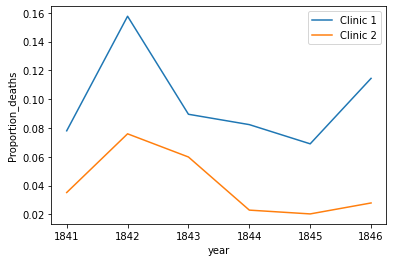

In [18]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = yearly1.plot(x="year", y="proportion_deaths", label="Clinic 1")
yearly2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax)
ax.set_ylabel("Proportion_deaths")

4. The handwashing begins


In [19]:
monthly=pd.read_csv(r"C:\Users\KIIT\Desktop\technolabs\Mini project 1\Data Science Final project\Dr. Semmelweis and the Discovery of Handwashing\datasets\monthly_deaths.csv", parse_dates=["date"])

In [20]:
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

In [21]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


5. The effect of handwashing

Text(0, 0.5, 'proportion_deaths')

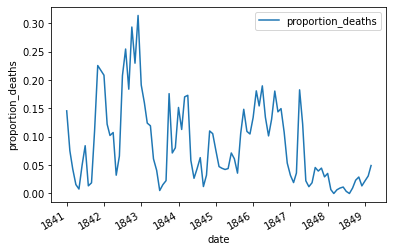

In [23]:
ax=monthly.plot(x="date",y="proportion_deaths")
ax.set_ylabel("proportion_deaths")

6. The effect of handwashing highlighted

Text(0, 0.5, 'Proportion deaths')

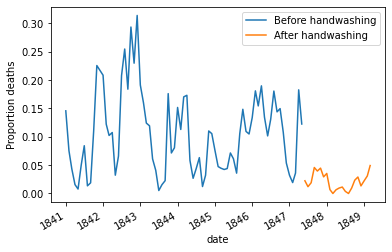

In [25]:
handwashing_start=pd.to_datetime("1847-06-01")
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]
ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing")
after_washing.plot(x="date", y="proportion_deaths",
                   label="After handwashing", ax=ax)
ax.set_ylabel("Proportion deaths")



7. More handwashing, fewer deaths?

In [26]:
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

8. A Bootstrap analysis of Semmelweis handwashing data

In [27]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101121
0.975   -0.067861
dtype: float64

9. The fate of Dr. Semmelweis

In [28]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True